In [84]:
#Q2.Food Dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [85]:
#1.reading data
data = pd.read_csv("/content/onlinefoods.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [86]:
data.shape



(388, 13)

In [87]:

#dropping unnamedcolumn
data.drop("Unnamed: 12",axis=1,inplace=True)
#Obtaining mean,standard deviation,min,max
data[['Age','Family size']].describe().T

data.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
dtype: int64

In [88]:

data.replace({"Single":0},inplace=True)
data.replace({"Married":1},inplace=True)
data.replace({"Prefer not to say":None},inplace=True)
#finding number of unique values in each columns

data["Marital Status"].unique()

array([0, 1, None], dtype=object)

In [89]:
#finding number of unique values in each columns

data['Occupation'].unique()

data['Monthly Income'].unique()


array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [90]:
#encoding string values into mumerical
data["Monthly Income"].replace({"No Income":0},inplace=True)
data["Monthly Income"].replace({"Below Rs.10000":5000},inplace=True) # median of income in this range
data["Monthly Income"].replace({"10001 to 25000":17500},inplace=True) # median of income in this range
data["Monthly Income"].replace({"25001 to 50000":37500},inplace=True) # median of income in this range
data["Monthly Income"].replace({"More than 50000":50000},inplace=True)

In [91]:
data['Educational Qualifications'].unique()
#encoding string values into mumerical

data["Educational Qualifications"].replace({"Uneducated":0},inplace=True)
data["Educational Qualifications"].replace({"School":1},inplace=True)
data["Educational Qualifications"].replace({"Graduate":2},inplace=True)
data["Educational Qualifications"].replace({"Post Graduate":3},inplace=True)
data["Educational Qualifications"].replace({"Ph.D":4},inplace=True)

In [92]:
#using label encoder transforming values into binary values
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

data['Output'] = LabelEncoder().fit_transform(data['Output'])

data['Feedback'] = LabelEncoder().fit_transform(data['Feedback'])

data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1


In [93]:

data["is working"] = None

data.loc[data["Occupation"] == "Student"         ,"is working"] = 0
data.loc[data["Occupation"] == "Self Employeed"  ,"is working"] = 1
data.loc[data["Occupation"] == "Employee"        ,"is working"] = 1
data.loc[data["Occupation"] == "House wife"      ,"is working"] = 0

data["is working"].unique()

array([0, 1], dtype=object)

In [94]:

data.head()

one_enc_df = pd.DataFrame(OneHotEncoder().fit_transform(pd.DataFrame(data["Occupation"])).toarray())
data = pd.concat([data,one_enc_df],axis=1)





#checking label encoded values
data[data["Occupation"] == "Employee"].head(1)



,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
5,27,0,1,Employee,50000,3,2,12.9299,77.6848,560103,1,1,1,1.0,0.0,0.0,0.0


In [95]:


data[data["Occupation"] == "House wife"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
37,32,0,None,House wife,0,2,5,12.982,77.6256,560008,1,0,0,0.0,1.0,0.0,0.0


In [96]:

data[data["Occupation"] == "Student"].head(1)




,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0


In [97]:

data[data["Occupation"] == "Self Employeed"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
14,23,0,0,Self Employeed,17500,3,5,12.9438,77.5738,560004,1,1,1,0.0,0.0,1.0,0.0


In [98]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1,0,0.0,0.0,0.0,1.0
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0,0,0.0,0.0,0.0,1.0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1,0,0.0,0.0,0.0,1.0
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1,0,0.0,0.0,0.0,1.0


In [99]:

data.rename(columns={
                     1:"is House wife",
                     0:"is Employee",
                     2:"is Self Employeed",
                     3:"is Student"} ,inplace=True)

data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,is Employee,is House wife,is Self Employeed,is Student
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1,0,0.0,0.0,0.0,1.0
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0,0,0.0,0.0,0.0,1.0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1,0,0.0,0.0,0.0,1.0
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1,0,0.0,0.0,0.0,1.0


In [100]:
data.drop(columns=["Occupation"],inplace=True)

In [108]:
data.head()

,Age,Gender,Marital Status,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,is Employee,is House wife,is Self Employeed,is Student
0,20,0,0,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0
1,24,0,0,5000,2,3,12.9770,77.5773,560009,1,1,0,0.0,0.0,0.0,1.0
2,22,1,0,5000,3,3,12.9551,77.6593,560017,1,0,0,0.0,0.0,0.0,1.0
3,22,0,0,0,2,6,12.9473,77.5616,560019,1,1,0,0.0,0.0,0.0,1.0
4,22,1,0,5000,3,4,12.9850,77.5533,560010,1,1,0,0.0,0.0,0.0,1.0


In [109]:
#checking sum of null values
data.isna().sum()


Age                           0
Gender                        0
Marital Status                0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
is working                    0
is Employee                   0
is House wife                 0
is Self Employeed             0
is Student                    0
dtype: int64

In [113]:
#fill null values in maritrial status column
data['Marital Status'].fillna(random.randint(0,1),inplace=True)

data["Marital Status"].isna().sum()


X= data.drop(columns=["Output"])
y= data["Output"]
data.head()


,Age,Gender,Marital Status,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,is Employee,is House wife,is Self Employeed,is Student
0,20,0,0,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0
1,24,0,0,5000,2,3,12.9770,77.5773,560009,1,1,0,0.0,0.0,0.0,1.0
2,22,1,0,5000,3,3,12.9551,77.6593,560017,1,0,0,0.0,0.0,0.0,1.0
3,22,0,0,0,2,6,12.9473,77.5616,560019,1,1,0,0.0,0.0,0.0,1.0
4,22,1,0,5000,3,4,12.9850,77.5533,560010,1,1,0,0.0,0.0,0.0,1.0


In [103]:
#Using KNN classifier for train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.12)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier

KNeighborsClassifier()

KNeighborsClassifier()

In [104]:

knn.score(X_train,y_train)

0.844574780058651

In [105]:
knn.score(X_test,y_test)

0.6382978723404256

In [116]:

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC

SVC()

svm.score(X_train,y_train)


0.7888563049853372

In [107]:

svm.score(X_test,y_test)

0.6808510638297872

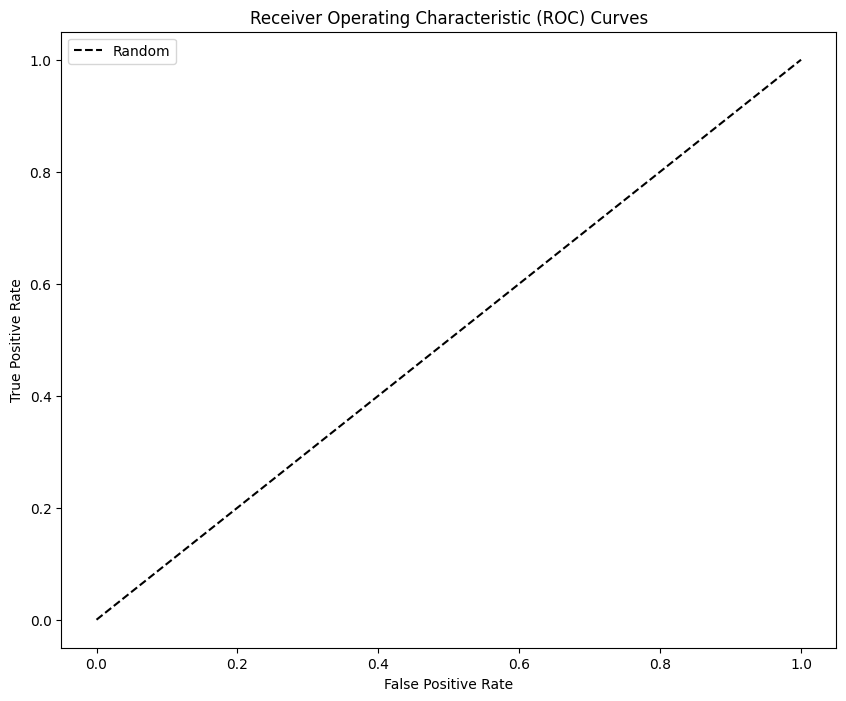

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 8))
for name, model in data.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
        auc_score = roc_auc_score(y_test_binary, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()